<a href="https://colab.research.google.com/github/IshantWadhwa4/COVID-19-EDA/blob/master/COVID_2019_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CORONA COVID-2019 India's Data 

### Step 1: Get Data 

Data Source is (https://data.humdata.org/dataset/5dff64bc-a671-48da-aa87-2ca40d7abf02)

In [0]:
import pandas as pd
import numpy as np

In [0]:
# world data of confirmed cases
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_confirmed = pd.read_csv(url_confirmed)
data_confirmed['Province/State'].fillna(data_confirmed['Country/Region'],inplace = True)

In [0]:
# world data of death cases
url_Deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
data_death = pd.read_csv(url_Deaths)
data_death['Province/State'].fillna(data_death['Country/Region'],inplace = True)


In [0]:
# world data of Recovered cases
url_Recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
data_Recovered = pd.read_csv(url_Recovered)
data_Recovered['Province/State'].fillna(data_Recovered['Country/Region'],inplace = True)

In [0]:
data_confirmed = data_confirmed.melt(id_vars=["Province/State", "Country/Region","Lat","Long"], 
        var_name="Date", 
        value_name="confirmed")

In [0]:
data_death = data_death.melt(id_vars=["Province/State", "Country/Region","Lat","Long"], 
        var_name="Date", 
        value_name="deaths")

In [0]:
data_Recovered = data_Recovered.melt(id_vars=["Province/State", "Country/Region","Lat","Long"], 
        var_name="Date", 
        value_name="recovered")

In [0]:
data = data_confirmed
data['deaths'] = data_death['deaths']
data['recovered'] = data_Recovered['recovered']

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15680 entries, 0 to 15679
Data columns (total 8 columns):
Province/State    15680 non-null object
Country/Region    15680 non-null object
Lat               15680 non-null float64
Long              15680 non-null float64
Date              15680 non-null object
confirmed         15680 non-null int64
deaths            15680 non-null int64
recovered         14679 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 980.1+ KB


In [0]:
data_india = data[data['Country/Region'] == 'India']

In [0]:
data_india.reset_index(drop=True, inplace=True)

In [24]:
data_india

,Province/State,Country/Region,Lat,Long,Date,confirmed,deaths,recovered
0,India,India,21.0,78.0,1/22/20,0,0,0.0
1,India,India,21.0,78.0,1/23/20,0,0,0.0
2,India,India,21.0,78.0,1/24/20,0,0,0.0
3,India,India,21.0,78.0,1/25/20,0,0,0.0
4,India,India,21.0,78.0,1/26/20,0,0,0.0
...,...,...,...,...,...,...,...,...
59,India,India,21.0,78.0,3/21/20,330,4,0.0
60,India,India,21.0,78.0,3/22/20,396,7,0.0
61,India,India,21.0,78.0,3/23/20,499,10,0.0
62,India,India,21.0,78.0,3/24/20,536,10,0.0


In [23]:
data_india.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 8 columns):
Province/State    64 non-null object
Country/Region    64 non-null object
Lat               64 non-null float64
Long              64 non-null float64
Date              64 non-null object
confirmed         64 non-null int64
deaths            64 non-null int64
recovered         64 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 4.1+ KB


In [22]:
data_india['recovered'].fillna(0,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [25]:
sum(data_india['recovered'])

3108.0

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

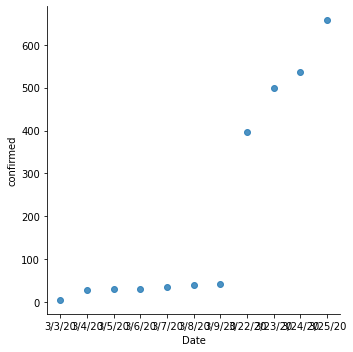

In [36]:
sns.lmplot(x='Date',y='confirmed',data=data_india[data_india['Date'] > '3/21/20'],fit_reg=False)